<a href="https://colab.research.google.com/github/Ashrafhusen/LearningMLmodels/blob/master/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x : x + 0.4 * torch.rand_like(x)),
    transforms.Lambda(lambda x : torch.clamp(x, 0., 1.))
])

In [13]:
transform

Compose(
    ToTensor()
    Lambda()
    Lambda()
)

In [14]:
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

In [15]:
train_loader = DataLoader(train_data, batch_size = 128, shuffle= True)

In [19]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid(),  # Output in [0,1]
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [20]:
model = DenoisingAutoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_fn = nn.MSELoss()

In [25]:
for epoch in range(50):
  total_loss = 0
  for imgs, _ in train_loader:
    recon = model(imgs)
    loss = loss_fn(recon, imgs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")



Epoch 1 Loss: 0.0190
Epoch 2 Loss: 0.0189
Epoch 3 Loss: 0.0189
Epoch 4 Loss: 0.0188
Epoch 5 Loss: 0.0187
Epoch 6 Loss: 0.0187
Epoch 7 Loss: 0.0187
Epoch 8 Loss: 0.0186
Epoch 9 Loss: 0.0186
Epoch 10 Loss: 0.0185
Epoch 11 Loss: 0.0185
Epoch 12 Loss: 0.0184
Epoch 13 Loss: 0.0184
Epoch 14 Loss: 0.0184
Epoch 15 Loss: 0.0183
Epoch 16 Loss: 0.0183
Epoch 17 Loss: 0.0183
Epoch 18 Loss: 0.0182
Epoch 19 Loss: 0.0182
Epoch 20 Loss: 0.0182
Epoch 21 Loss: 0.0181
Epoch 22 Loss: 0.0181
Epoch 23 Loss: 0.0181
Epoch 24 Loss: 0.0181
Epoch 25 Loss: 0.0180
Epoch 26 Loss: 0.0180
Epoch 27 Loss: 0.0180
Epoch 28 Loss: 0.0180
Epoch 29 Loss: 0.0179
Epoch 30 Loss: 0.0179
Epoch 31 Loss: 0.0179
Epoch 32 Loss: 0.0179
Epoch 33 Loss: 0.0179
Epoch 34 Loss: 0.0178
Epoch 35 Loss: 0.0178
Epoch 36 Loss: 0.0178
Epoch 37 Loss: 0.0178
Epoch 38 Loss: 0.0178
Epoch 39 Loss: 0.0178
Epoch 40 Loss: 0.0177
Epoch 41 Loss: 0.0177
Epoch 42 Loss: 0.0177
Epoch 43 Loss: 0.0177
Epoch 44 Loss: 0.0177
Epoch 45 Loss: 0.0177
Epoch 46 Loss: 0.01

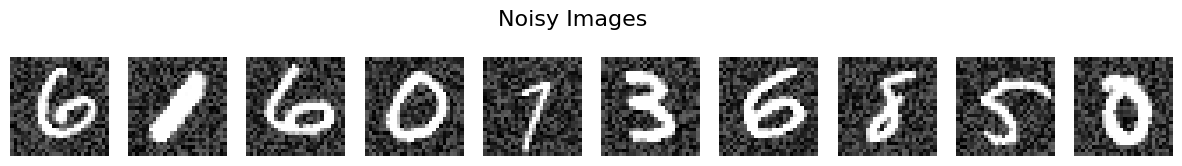

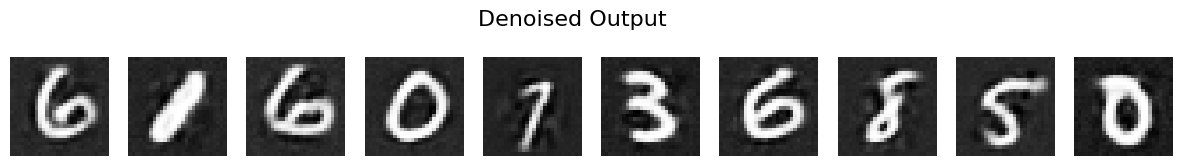

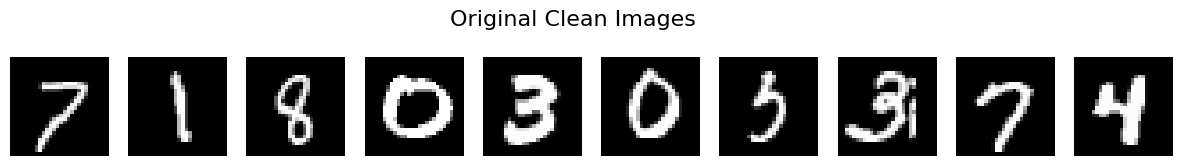

In [26]:
import matplotlib.pyplot as plt

test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

clean_transform = transforms.ToTensor()
clean_test_data = datasets.MNIST(root="./data", train=False, download=True, transform=clean_transform)

noisy_imgs, _ = next(iter(test_loader))
clean_imgs, _ = next(iter(DataLoader(clean_test_data, batch_size=10, shuffle=True)))

model.eval()
with torch.no_grad():
    denoised_imgs = model(noisy_imgs)

def show_images(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 2))
    fig.suptitle(title, fontsize=16)
    for img, ax in zip(images, axes):
        ax.imshow(img.squeeze(), cmap="gray")
        ax.axis("off")
    plt.show()

show_images(noisy_imgs[:10], "Noisy Images")
show_images(denoised_imgs[:10], "Denoised Output")
show_images(clean_imgs[:10], "Original Clean Images")
